In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# 경로 지정
print('현재 경로 : ',os.getcwd())

train_dir = './Exm_See_Gen_img/'
#val_dir = './Validation/'
#test_dir = './Test/'

현재 경로 :  c:\Users\T\Desktop\Temp\5_Flower_Types_Classification_Generator


In [6]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)
'''
val_data_gen = ImageDataGenerator(
    rescale = 1./255,
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255,
)'''

'\nval_data_gen = ImageDataGenerator(\n    rescale = 1./255,\n)\n\ntest_data_gen = ImageDataGenerator(\n    rescale = 1./255,\n)'

In [7]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)
'''
val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)'''

Found 25 images belonging to 5 classes.


"\nval_gen = val_data_gen.flow_from_directory(\n    val_dir,\n    target_size = (160,160),\n    class_mode = 'categorical'\n)\n\ntest_gen = test_data_gen.flow_from_directory(\n    test_dir,\n    target_size = (160,160),\n    class_mode = 'categorical'\n)"

(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        

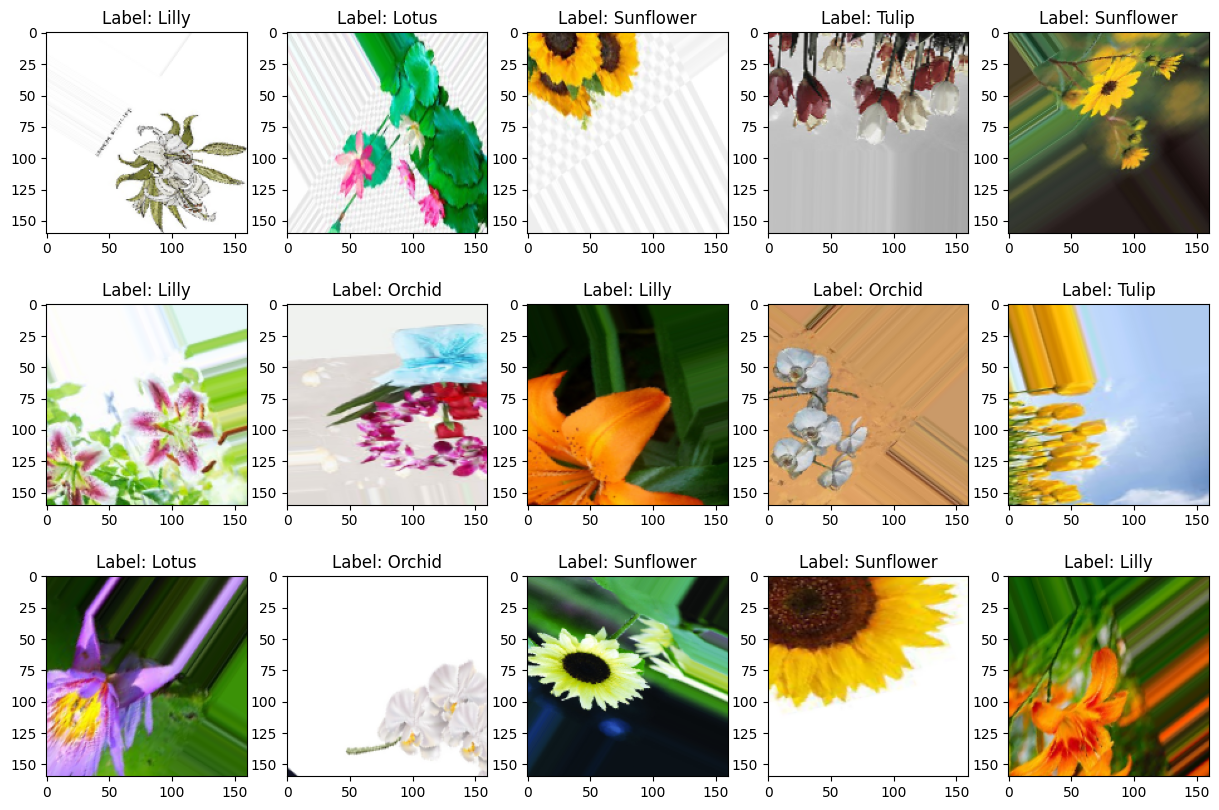

In [8]:
# 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)

images, labels = batch

print(len(images))

# idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()